In [1]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
import datetime

In [2]:
basedir = './국토교통부_실거래가_공개시스템/땅값분석/'
yunrip_df = pd.read_csv(basedir + 'yunrip_30.csv')
commerce_df = pd.read_csv(basedir + 'commerce_30.csv')
land_df = pd.read_csv(basedir + 'land.csv')

In [3]:
common_cols = ['시군구', '번지', '용도지역', '도로조건', '계약날짜', '대지면적(㎡)', '거래금액(만원)', '단가(㎡)', '단가(평)', '부동산유형', '건물연식']
common_df = pd.concat([yunrip_df[common_cols], commerce_df[common_cols], land_df[[col for col in land_df.columns if col not in ['지목', '지분구분', '해제사유발생일']]]])
common_df['계약날짜'] = pd.to_datetime(common_df['계약날짜'], format='%Y-%m-%d')
print(common_df.shape)
common_df.head()

(282497, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),부동산유형,건물연식
0,서울특별시 강남구 개포동,171-13,제2종일반주거지역,8m미만,2006-12-20,56.1,56500.0,1007.130125,3329.355660,연립다세대,33.0
1,서울특별시 강남구 개포동,171-13,제2종일반주거지역,8m미만,2016-01-16,39.6,23300.0,588.383838,1945.070467,연립다세대,33.0
2,서울특별시 강남구 개포동,171-13,제2종일반주거지역,8m미만,2016-04-09,39.6,24500.0,618.686869,2045.245770,연립다세대,33.0
3,서울특별시 강남구 개포동,171-13,제2종일반주거지역,8m미만,2019-10-23,56.1,60000.0,1069.518717,3535.598930,연립다세대,33.0
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2006-12-09,45.0,40500.0,900.000000,2975.206500,연립다세대,33.0


In [4]:
dandok_filenames = [f for f in os.listdir('./국토교통부_실거래가_공개시스템/단독다가구/매매/') if (f.endswith('.csv'))&('(매매)' in f)]
dandok_filenames

['단독다가구(매매)_실거래가_20060101_20061231.csv',
 '단독다가구(매매)_실거래가_20070101_20071231.csv',
 '단독다가구(매매)_실거래가_20080101_20081231.csv',
 '단독다가구(매매)_실거래가_20090101_20091231.csv',
 '단독다가구(매매)_실거래가_20100101_20101231.csv',
 '단독다가구(매매)_실거래가_20110101_20111231.csv',
 '단독다가구(매매)_실거래가_20120101_20121231.csv',
 '단독다가구(매매)_실거래가_20130101_20131231.csv',
 '단독다가구(매매)_실거래가_20140101_20141231.csv',
 '단독다가구(매매)_실거래가_20150101_20151231.csv',
 '단독다가구(매매)_실거래가_20160101_20161231.csv',
 '단독다가구(매매)_실거래가_20170101_20171231.csv',
 '단독다가구(매매)_실거래가_20180101_20181231.csv',
 '단독다가구(매매)_실거래가_20190101_20191231.csv',
 '단독다가구(매매)_실거래가_20200101_20201231.csv',
 '단독다가구(매매)_실거래가_20210101_20210503.csv']

In [5]:
dfs_list = []
for f in dandok_filenames:
    df = pd.read_csv('./국토교통부_실거래가_공개시스템/단독다가구/매매/' + f, encoding='euc-kr', header=15)
    if '해제사유발생일' in df.columns:
        df = df[df['해제사유발생일'].isna()]
        df = df.drop(columns=['해제사유발생일'])
    dfs_list.append(df)

In [6]:
dandok_df = pd.concat(dfs_list).reset_index(drop=True)
print(dandok_df.shape)
dandok_df.head()

(194804, 11)


,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명
0,서울특별시 강남구 개포동,2**,다가구,-,208.09,107.9,200604,17,"34,200",1989.0,NaN
1,서울특별시 강남구 개포동,2**,다가구,-,194.67,117.0,200604,18,"47,900",1993.0,NaN
2,서울특별시 강남구 개포동,2**,다가구,-,299.78,129.9,200601,24,"61,000",1994.0,NaN
3,서울특별시 강남구 개포동,2**,다가구,-,188.89,130.1,200605,16,"52,500",1993.0,NaN
4,서울특별시 강남구 개포동,2**,다가구,-,313.20,134.7,200606,27,"56,000",1992.0,NaN


In [7]:
dandok_df['구'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[1])
dandok_df['동'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[2])
dandok_df['거래금액(만원)'] = dandok_df['거래금액(만원)'].apply(lambda x: int(x.replace(',','')))
dandok_df['대지면적(㎡)'] = dandok_df['대지면적(㎡)'].apply(float)
dandok_df['단가(평)'] = dandok_df['거래금액(만원)'] / dandok_df['대지면적(㎡)'] * 3.305785

In [8]:
def day_modifier(x):
    # x is a number
    
    if pd.isna(x) == True:
        return x
    else:
        x = str(x)
        if len(x) == 1:
            return '0' + x
        else:
            return x

In [9]:
dandok_df['계약날짜'] = dandok_df['계약년월'].apply(lambda x: str(x)[:4]) + '-' +\
dandok_df['계약년월'].apply(lambda x: str(x)[-2:]) + '-' + dandok_df['계약일'].apply(day_modifier)

In [10]:
dandok_df['계약날짜'] = pd.to_datetime(dandok_df['계약날짜'])

In [11]:
dandok_df.drop(columns=['계약년월', '계약일'], inplace=True)

In [12]:
common_df['구'] = common_df['시군구'].apply(lambda x: x.split(' ')[1])
dandok_df['구'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[1])
common_df['동'] = common_df['시군구'].apply(lambda x: x.split(' ')[2])
dandok_df['동'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[2])

In [13]:
target_gu = '광진구'
target_dong = '화양동'
target_purpose = '준주거'
date_today = pd.to_datetime(datetime.datetime.now())

In [14]:
dandok_df['건물연식'] = date_today.year - dandok_df['건축년도']

In [15]:
target_df = common_df[
    (common_df['구'] == target_gu)
    &(common_df['동'] == target_dong)
    &(common_df['용도지역'].str.contains(target_purpose))
    &(common_df['계약날짜'] >= (date_today - pd.DateOffset(months=18)))
].sort_values(['번지'])
print(target_df.shape)
target_df.head()

(13, 13)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),부동산유형,건물연식,구,동
21738,서울특별시 광진구 화양동,*,준주거,25m이상,2019-11-06,246.3,440000.0,1786.439302,5905.584247,상업업무,32.0,광진구,화양동
23526,서울특별시 광진구 화양동,*,준주거,8m미만,2020-06-18,100.5,177000.0,1761.194030,5822.128806,상업업무,46.0,광진구,화양동
23530,서울특별시 광진구 화양동,*,준주거,25m이상,2020-11-10,234.4,400000.0,1706.484642,5641.271331,상업업무,51.0,광진구,화양동
23531,서울특별시 광진구 화양동,*,준주거,25m이상,2020-11-30,103.5,377600.0,3648.309179,12060.525758,상업업무,48.0,광진구,화양동
25184,서울특별시 광진구 화양동,*,준주거,8m미만,2021-02-25,120.3,375000.0,3117.206983,10304.816085,상업업무,47.0,광진구,화양동


In [20]:
target_df

,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),부동산유형,건물연식,구,동
21738,서울특별시 광진구 화양동,*,준주거,25m이상,2019-11-06,246.30,440000.0,1786.439302,5905.584247,상업업무,32.0,광진구,화양동
23526,서울특별시 광진구 화양동,*,준주거,8m미만,2020-06-18,100.50,177000.0,1761.194030,5822.128806,상업업무,46.0,광진구,화양동
23530,서울특별시 광진구 화양동,*,준주거,25m이상,2020-11-10,234.40,400000.0,1706.484642,5641.271331,상업업무,51.0,광진구,화양동
23531,서울특별시 광진구 화양동,*,준주거,25m이상,2020-11-30,103.50,377600.0,3648.309179,12060.525758,상업업무,48.0,광진구,화양동
25184,서울특별시 광진구 화양동,*,준주거,8m미만,2021-02-25,120.30,375000.0,3117.206983,10304.816085,상업업무,47.0,광진구,화양동
25185,서울특별시 광진구 화양동,*,준주거,8m미만,2021-02-25,120.30,400000.0,3325.020781,10991.803824,상업업무,30.0,광진구,화양동
25187,서울특별시 광진구 화양동,*,준주거,8m미만,2021-03-09,52.55,88000.0,1674.595623,5535.853092,상업업무,30.0,광진구,화양동
107868,서울특별시 광진구 화양동,*,준주거지역,-,2020-08-01,17.42,1900.0,109.070034,360.562084,토지,NaN,광진구,화양동
107869,서울특별시 광진구 화양동,*,준주거지역,-,2020-08-01,17.42,2000.0,114.810563,379.539036,토지,NaN,광진구,화양동
107915,서울특별시 광진구 화양동,*,준주거지역,-,2020-08-05,3.48,1500.0,431.034483,1424.907328,토지,NaN,광진구,화양동


In [16]:
dandok_target_df = dandok_df[
    (dandok_df['구'] == target_gu)
    &(dandok_df['동'] == target_dong)
    &(dandok_df['계약날짜'] >= (date_today - pd.DateOffset(months=18)))
].sort_values(['번지'], ascending=False)
print(dandok_target_df.shape)
dandok_target_df.head()

(46, 14)


,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,도로명,구,동,단가(평),계약날짜,건물연식
183380,서울특별시 광진구 화양동,9*,다가구,8m미만,113.59,89.0,105000,1995.0,군자로6길,광진구,화양동,3900.083427,2020-10-29,26.0
183394,서울특별시 광진구 화양동,9*,다가구,8m미만,789.53,278.0,465000,1996.0,능동로17길,광진구,화양동,5529.460522,2020-02-10,25.0
183385,서울특별시 광진구 화양동,9*,다가구,8m미만,78.45,96.0,110000,1995.0,군자로6길,광진구,화양동,3787.878646,2020-10-29,26.0
183382,서울특별시 광진구 화양동,9*,다가구,8m미만,132.90,89.0,211750,1995.0,군자로6길,광진구,화양동,7865.168244,2020-03-10,26.0
183381,서울특별시 광진구 화양동,9*,다가구,8m미만,118.35,89.0,140000,1994.0,군자로6길,광진구,화양동,5200.111236,2020-03-10,27.0


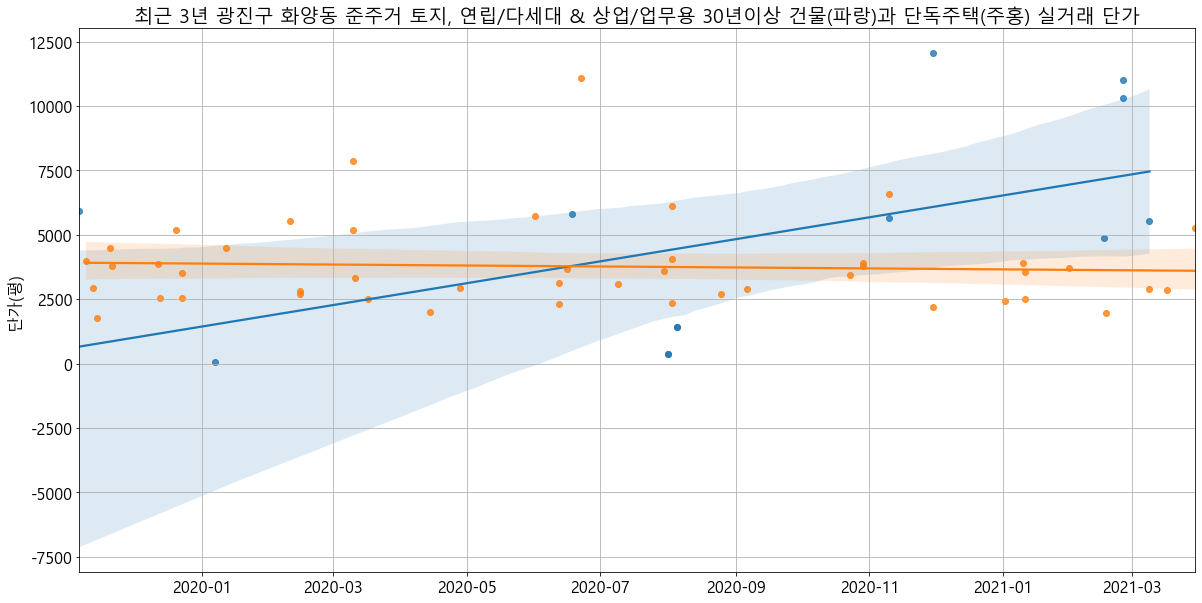

In [21]:
font = {'size': 16}
matplotlib.rc('font', **font)
f, ax = plt.subplots(figsize=(20,10))
plt.title('최근 3년 {} {} {} 토지, 연립/다세대 & 상업/업무용 30년이상 건물(파랑)과 단독주택(주홍) 실거래 단가'.format(target_gu, target_dong, target_purpose))
plt.grid(True)
ax.xaxis.update_units(target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(target_df['계약날짜']), y=target_df['단가(평)'])#, order=3, ci=None)
ax.xaxis.update_units(dandok_target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(dandok_target_df['계약날짜']), y=dandok_target_df['단가(평)'])#, order=3, ci=None)
#plt.ylim([0, 6000])
plt.savefig(basedir + '{}_{}_{}/산포도.png'.format(target_gu, target_dong, target_purpose))